# Bandit Problem

In [22]:
# imports
from bandits import Bandit
import random
# Include your imports here, if any are used. 

import numpy as np
import matplotlib.pyplot as plt

A list of ten bandit objects initialized in the list...

In [23]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]
q_values = np.zeros(10)  
counts = np.zeros(10)  

In [24]:
bandits[0].pullLever()

-0.9625312615668156

## Greedy algorithm Implementation

In [25]:
def run_greedy(iterations=1000):
    global q_values, counts
    rewards = []
    
    for _ in range(iterations):
        best_bandit = np.argmax(q_values)
        reward = bandits[best_bandit].pullLever()
        counts[best_bandit] += 1
        q_values[best_bandit] += (reward - q_values[best_bandit]) / counts[best_bandit]
        rewards.append(reward)

    return rewards

Plot the cumulative average of rewards as the number of iterations increases.

## Greedy Algorithm Cumulative Average Rewards




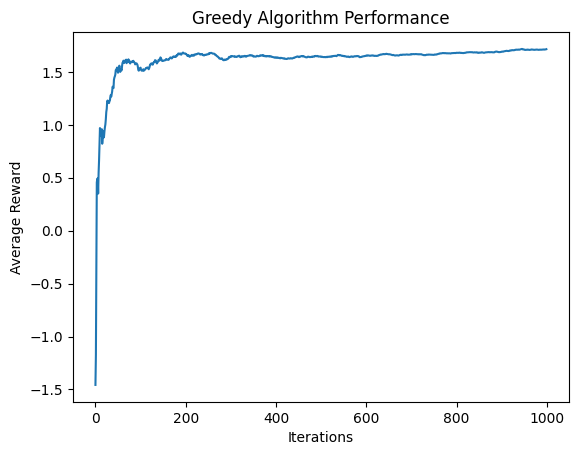

In [26]:
rewards = run_greedy()
cumulative_avg_rewards = np.cumsum(rewards) / (np.arange(len(rewards)) + 1)

plt.plot(cumulative_avg_rewards)
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.title('Greedy Algorithm Performance')
plt.show()


In [27]:
print(f"Final estimated values: {q_values}")
print(f"Number of times each bandit was selected: {counts}")


Final estimated values: [-1.45681747 -0.88985464  1.72065901  0.          0.          0.
  0.          0.          0.          0.        ]
Number of times each bandit was selected: [  1.   1. 998.   0.   0.   0.   0.   0.   0.   0.]


## $\epsilon$-greedy Algorithm

In [28]:
def run_epsilon_greedy(epsilon, iterations=1000):
    global q_values, counts
    rewards = []

    for _ in range(iterations):
        if random.random() < epsilon:
            chosen_bandit = random.randint(0, 9)
        else:
            chosen_bandit = np.argmax(q_values)
        
        reward = bandits[chosen_bandit].pullLever()
        counts[chosen_bandit] += 1
        q_values[chosen_bandit] += (reward - q_values[chosen_bandit]) / counts[chosen_bandit]
        rewards.append(reward)
    
    return rewards


Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

In [29]:
# Epsilon-Greedy Algorithm

#The ε-greedy strategy balances exploration and exploitation by selecting a random action with probability ε and the best-known action otherwise.  
#The plot below shows the cumulative average rewards for different values of ε.


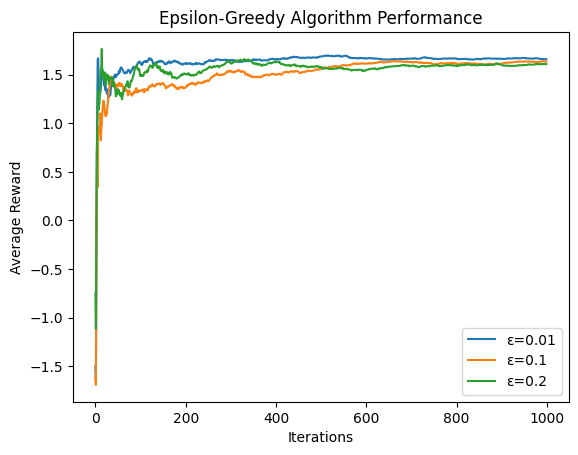

In [30]:
epsilons = [0.01, 0.1, 0.2]
for eps in epsilons:
    q_values.fill(0)  # Reset estimates
    counts.fill(0)  # Reset counts
    rewards = run_epsilon_greedy(eps)
    cumulative_avg_rewards = np.cumsum(rewards) / (np.arange(len(rewards)) + 1)
    plt.plot(cumulative_avg_rewards, label=f'ε={eps}')

plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.title('Epsilon-Greedy Algorithm Performance')
plt.legend()
plt.show()


## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

In [31]:
optimal_eps = 0.1
q_values.fill(0)
counts.fill(0)
rewards = run_epsilon_greedy(optimal_eps, iterations=1000)
print(f"Total reward with ε={optimal_eps}: {sum(rewards)}")


Total reward with ε=0.1: 1762.8580837566305


In [32]:
for eps in [0.01, 0.05, 0.1, 0.2]:
    q_values.fill(0)
    counts.fill(0)
    rewards = run_epsilon_greedy(eps, 1000)
    print(f"Epsilon: {eps}, Total Reward: {sum(rewards)}")


Epsilon: 0.01, Total Reward: 1819.2954535294593
Epsilon: 0.05, Total Reward: 1907.2850826574713
Epsilon: 0.1, Total Reward: 1703.6105809058006
Epsilon: 0.2, Total Reward: 1595.9454573373898


## Optimistic Initial Values

In [33]:
def run_optimistic_greedy(initial_value=10, iterations=1000):
    global q_values, counts
    q_values.fill(initial_value)  # Optimistic initialization
    counts.fill(0)
    rewards = []

    for _ in range(iterations):
        best_bandit = np.argmax(q_values)
        reward = bandits[best_bandit].pullLever()
        counts[best_bandit] += 1
        q_values[best_bandit] += (reward - q_values[best_bandit]) / counts[best_bandit]
        rewards.append(reward)

    return rewards


Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$

In [34]:
# Optimistic Initial Values

#Optimistic initial values encourage exploration by setting high initial estimates for each action.  
#The plot below compares the performance of optimistic and non-optimistic approaches.


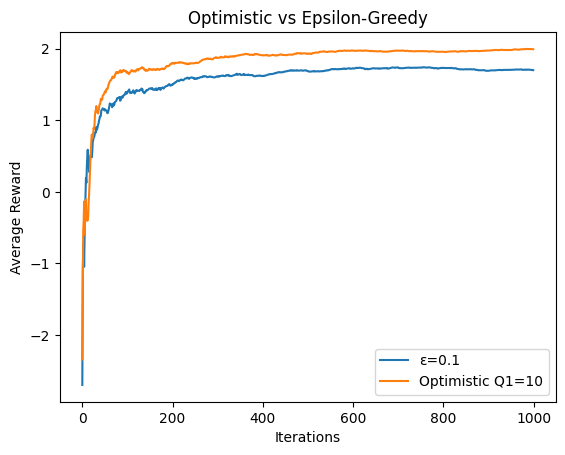

In [35]:
q_values.fill(0)
counts.fill(0)
rewards_eps = run_epsilon_greedy(0.1, 1000)
q_values.fill(10)
counts.fill(0)
rewards_optimistic = run_optimistic_greedy(10, 1000)

plt.plot(np.cumsum(rewards_eps) / (np.arange(len(rewards_eps)) + 1), label='ε=0.1')
plt.plot(np.cumsum(rewards_optimistic) / (np.arange(len(rewards_optimistic)) + 1), label='Optimistic Q1=10')
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.title('Optimistic vs Epsilon-Greedy')
plt.legend()
plt.show()


## Optional - Upper Confidence Bound (UCB)

In [7]:
def run_ucb(c):
    # TODO: Implement the UCB algorithm here
    # Return the reward from the bandits in a list
    pass